we need to Predict the salary if the employee using the features provided in the data. 
https://github.com/kimmi27789/dataset3/blob/main/Salaries.csv

# Import Libraries

In [54]:
#import libraries to do EDA Process 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Import Data Set

In [188]:
#import data set
df = pd.read_csv('Salaries.csv')
df.head() #first 5 rows of salary data set

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


# Descriptive Analysis

In [189]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

Observations
- there are in total 6 columns in the dataset
- RANK - this is about the designation of the person
- Discipline - there are 2 different disciplines/working domains
- yrs.since.phd - this tells about how many years ago person did his/her phd
- yrs.service - this tells about the work experience of the person
- sex - this tells about the gender of the person
- salary - this tells the current salary of that person

In [190]:
df.info() #info to the data frame 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


Observations - 
- dataset contains total 397 entries
- there are total 6 columns
- 3 columns contain numerical data yrs.since.phd, yrs.service, salary which is of integer type
- 3 columns contains categorical data rank, discipline, sex 
- there is no null data
- total memory usage is 18+kb

In [191]:
df.describe(include='all')

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397,397,397.000000,397.000000,397,397.000000
unique,3,2,NaN,NaN,2,NaN
top,Prof,B,NaN,NaN,Male,NaN
freq,266,216,NaN,NaN,358,NaN
mean,NaN,NaN,22.314861,17.614610,NaN,113706.458438
std,NaN,NaN,12.887003,13.006024,NaN,30289.038695
min,NaN,NaN,1.000000,0.000000,NaN,57800.000000
25%,NaN,NaN,12.000000,7.000000,NaN,91000.000000
50%,NaN,NaN,21.000000,16.000000,NaN,107300.000000
75%,NaN,NaN,32.000000,27.000000,NaN,134185.000000


Observations
- RANK - there are 3 unique ranks and 266 entries are for prof rank
- Discipline - there are majorly 2 discipline and max entries ie 216 are for displine B
- Sex - there are 2 unique values in this field and max employee are male (358)
- yrs.since.phd - min year = 1 , max year = 56, mean = 22.31, std = 12.88 and 50% of employee have phd years below 21 years
- yrs.service - min exp = 0 , max exp = 60, mean = 17.61, std = 13, 50% of employee have exp below 16 years
- salary - min salary = 57800, max salary = 231545, mean = 113706, std = 30289, 50% of employee have salary below 107300

# Null Value Analysis

In [192]:
df.isnull().sum() #to find the null/undefined data in the data set

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

Observation-
- There is no null data throughout the dataset, hence imputation not required

# Duplicate Data Analysis

In [193]:
df.drop_duplicates(inplace=True)

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           393 non-null    object
 1   discipline     393 non-null    object
 2   yrs.since.phd  393 non-null    int64 
 3   yrs.service    393 non-null    int64 
 4   sex            393 non-null    object
 5   salary         393 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 21.5+ KB


Observation
- Intially there were 397 row and now it is 393 after removing duplicate rows

# Catogorical Data Analysis

1) RANK

In [195]:
df['rank'].value_counts()

Prof         266
AssocProf     64
AsstProf      63
Name: rank, dtype: int64

Observation - there are 266 Professors, 64 Assoc Professors and 63 Asst Professors in the dataset, hence Professors are in large number as compared to other disgnations.

2) DISCIPLINE

In [196]:
df['discipline'].value_counts()

B    212
A    181
Name: discipline, dtype: int64

Observation - 212 employee are working under division A and 181 are working under division B, employee are almost equally divided under 2 divisions

3) GENDER

In [197]:
df['sex'].value_counts()

Male      354
Female     39
Name: sex, dtype: int64

Observation - 354 employee are Male while 39 are female, hence male are in comparatively large number

# Visualizing Categorical Data

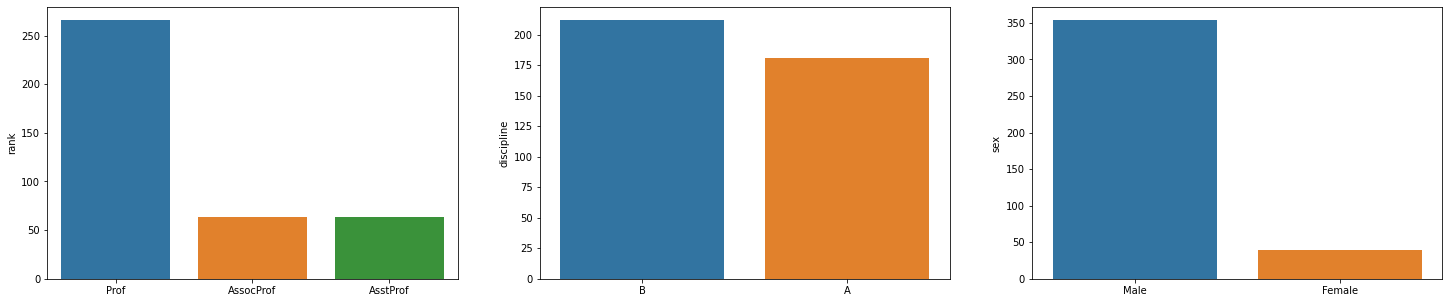

In [198]:
plt.figure(figsize=(25,5))

plt.subplot(1,3,1)
rank = sns.barplot(x=df['rank'].value_counts().index, y = df['rank'].value_counts())

plt.subplot(1,3,2)
rank = sns.barplot(x=df['discipline'].value_counts().index, y = df['discipline'].value_counts())

plt.subplot(1,3,3)
rank = sns.barplot(x=df['sex'].value_counts().index, y = df['sex'].value_counts())

Observation -
- can clearly see max no. of employee are Professors in the data set, who are male

# Analysing Salary Variation wrt Categorical Data

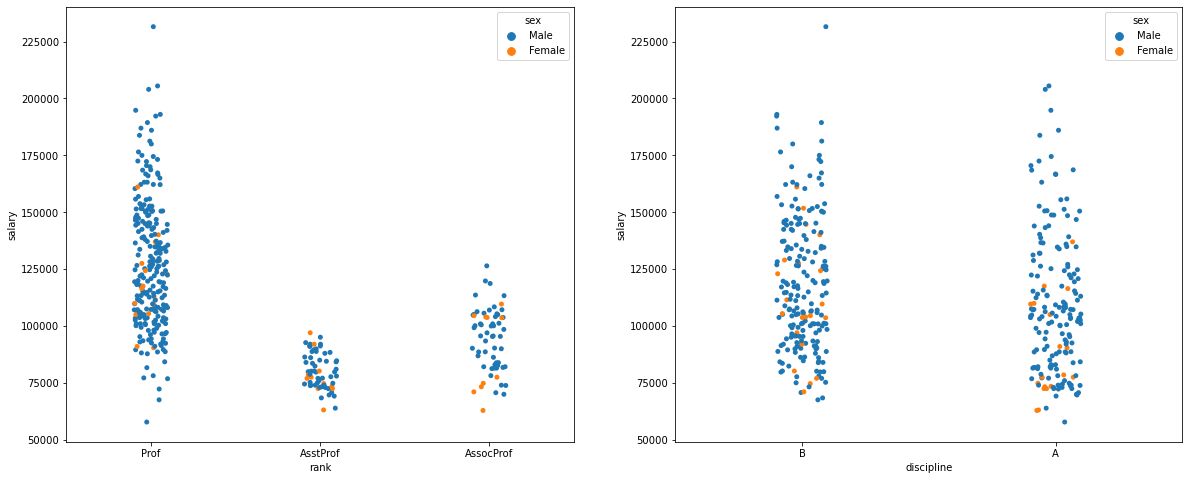

In [199]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.stripplot(x="rank", y="salary", hue="sex", data=df)
plt.subplot(1,2,2)
sns.stripplot(x="discipline", y="salary", hue="sex",data=df)
plt.show()

Observation - 
- Salary is higher for Professors and minimum for Asst professors but not impacted much by disciplines
- Females are less as compared to the male

# Visualizing phd years, service years, salary wrt rank

<AxesSubplot:xlabel='salary', ylabel='Count'>

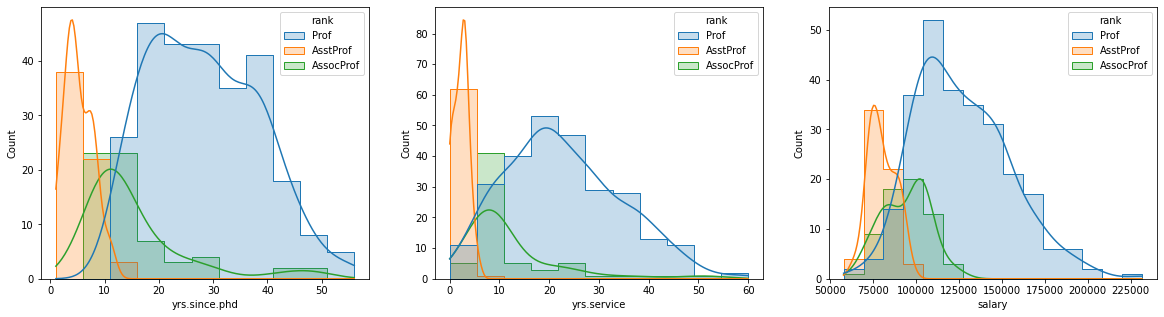

In [200]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.histplot(data = df, x='yrs.since.phd',hue = 'rank', color='g',kde=True, element='step')

plt.subplot(1,3,2)
sns.histplot(data = df, x='yrs.service',hue = 'rank', color='b',kde=True, element='step')

plt.subplot(1,3,3)
sns.histplot(data = df, x='salary',hue = 'rank', color='r',kde=True, element='step')

Observation - 
- Higher number of professors have done phd far ago than assoc professors or assistant Professors
- Professors have higher service experience than other ranks
- Professors are offered higher salaries than other ranks

# Visualizing Salary variation wrt phd years and service years 

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

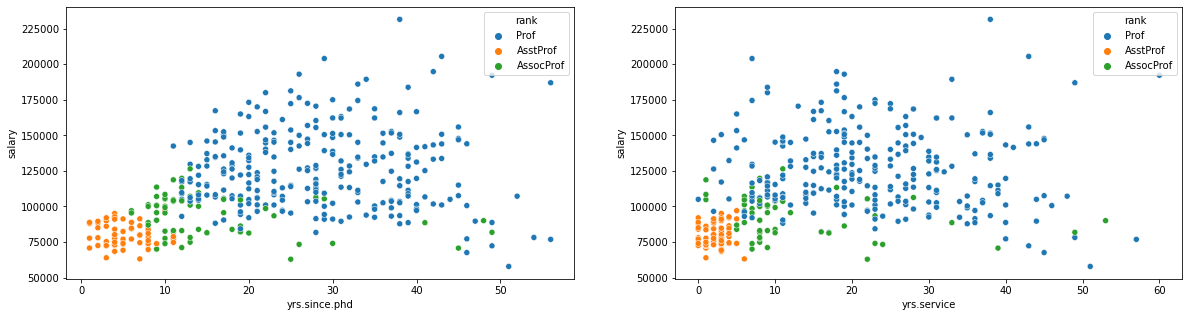

In [201]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.scatterplot(x="yrs.since.phd",y="salary",hue='rank',data=df)
plt.subplot(1,2,2)
sns.scatterplot(x="yrs.service",y="salary",hue='rank', data=df)

Observation-
- Salary is increasing by an increase in the number of years since phd
- Salaries are higher at 15-25 years of service
- Professors have higher salaries, service experiences and years since phd

# Visualizing all data together

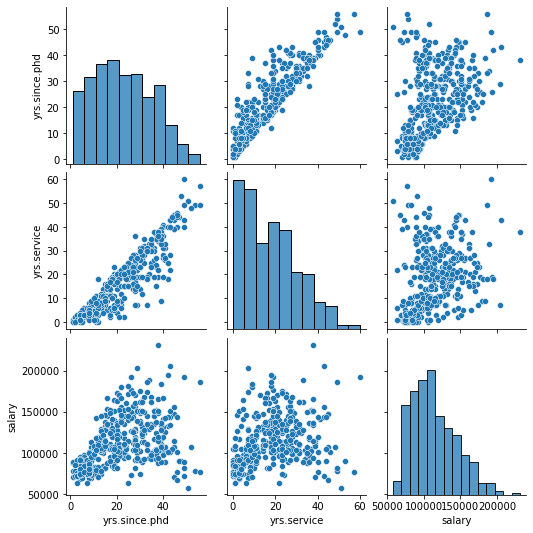

In [202]:
sns.pairplot(df)

Observation -
- There is some skewness in data
- yrs.service and yrs.since.phd have linear relationship

# Label Encoding

I choose label encoding to perform encoding of categorical data as the rank, discipline and sex are ordinal in nature

In [203]:
#make a deep copy of the data frame
df_encoded = df.copy(deep=True)

label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'Rank'. 
df_encoded['rank']= label_encoder.fit_transform(df_encoded['rank']) 

# Encode labels in column 'discipline'. 
df_encoded['discipline']= label_encoder.fit_transform(df_encoded['discipline']) 

# Encode labels in column 'Sex'. 
df_encoded['sex']= label_encoder.fit_transform(df_encoded['sex']) 

df_encoded


,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


Observation- 
- rank has been encoded as Assoc Prof = 0, Asst Professor = 1, Professor = 2
- discipline has been encoded as A = 0, B = 1
- sex has been encoded as male = 1, female = 0

# Correlation

In [204]:
#lets find out the corelation between data
df_encoded.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.080529,0.522381,0.443792,0.135138,0.519823
discipline,-0.080529,1.000000,-0.207739,-0.156227,0.000652,0.164018
yrs.since.phd,0.522381,-0.207739,1.000000,0.908882,0.155373,0.414042
yrs.service,0.443792,-0.156227,0.908882,1.000000,0.158334,0.329624
sex,0.135138,0.000652,0.155373,0.158334,1.000000,0.141521
salary,0.519823,0.164018,0.414042,0.329624,0.141521,1.000000


<AxesSubplot:>

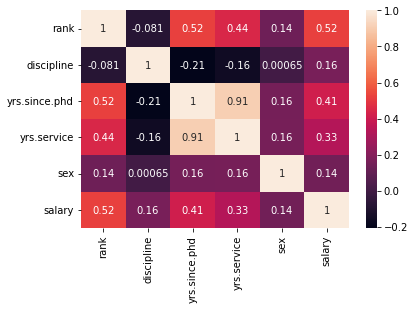

In [205]:
sns.heatmap(df_encoded.corr(), annot=True)

Observation - 
- phd_years and service_years columns are highly correlated to eachother
- sex and salary have least correlation
- rank and discipline have least or almost no correlation

In [206]:
df_encoded.corr()['salary'].sort_values()

sex              0.141521
discipline       0.164018
yrs.service      0.329624
yrs.since.phd    0.414042
rank             0.519823
salary           1.000000
Name: salary, dtype: float64

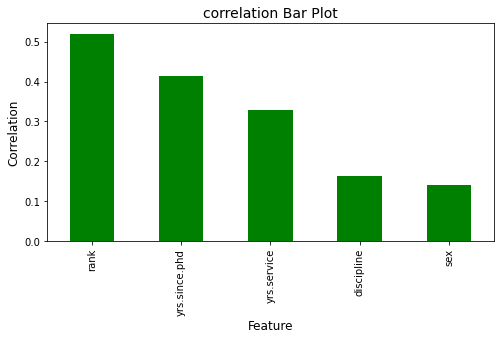

In [207]:
plt.figure(figsize=(8,4))
df_encoded.corr()['salary'].sort_values(ascending=False).drop(['salary']).plot(kind='bar' ,color='g')
plt.xlabel('Feature' ,fontsize=12)
plt.ylabel('Correlation',fontsize=12)
plt.title('correlation Bar Plot',fontsize=14)
plt.show()

Observation-
- rank is strongly correlated to salary 51.9%
- yrs.since.phd is also strongly corelated to salary 41.4%
- yrs.service has a good bond with salary 32.9%
- discipline and sex have weak bond with salary 16.4% and 14% respectively

# Detecting Multicollinearity with VIF

Observed using heatmap that two independent variables yrs.since.phd and yrs.service are highly collinear. Detecting multicollinearlity using VIF Score

In [208]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()

#drop the dependent variable
#df_encoded.drop(['salary'],axis=1, inplace=True)

vif_data["feature"] = df_encoded.columns
vif_data["VIF"] = [variance_inflation_factor(df_encoded.values, i) for i in range(len(df_encoded.columns))]
print(vif_data)


         feature        VIF
0           rank   8.167260
1     discipline   2.479032
2  yrs.since.phd  28.241992
3    yrs.service  16.979790
4            sex   7.436857
5         salary  16.804933


VIF values ranging between 1 and 5 are moderate. They represent a medium level of collinearity. Values of more than 5 are highly collinear.

Observation-
- As VIF score for yrs.since.phd is quite high, we need to drop that column

In [209]:
# VIF dataframe
vif_data1 = pd.DataFrame()

#drop the yrs.since.phd variable
df_encoded.drop(['yrs.since.phd'],axis=1, inplace=True)

vif_data1["feature"] = df_encoded.columns
vif_data1["VIF"] = [variance_inflation_factor(df_encoded.values, i) for i in range(len(df_encoded.columns))]
print(vif_data1)

       feature        VIF
0         rank   7.852594
1   discipline   2.365056
2  yrs.service   3.786461
3          sex   7.422804
4       salary  14.983984


Observation- 
- By droping yrs.since.phd, VIF score for rest of the features have fallen into moderate range

# Skewness

In [210]:
#first drop yrs.since.phd from df
df.drop(['yrs.since.phd'],axis=1, inplace=True)

df.skew()

yrs.service    0.638491
salary         0.698471
dtype: float64

Observation- 
- The acceptable skewness range is +/- 0.5, year.service and salary have little skewed data

# Shape of Distribution curve

<AxesSubplot:xlabel='salary', ylabel='Count'>

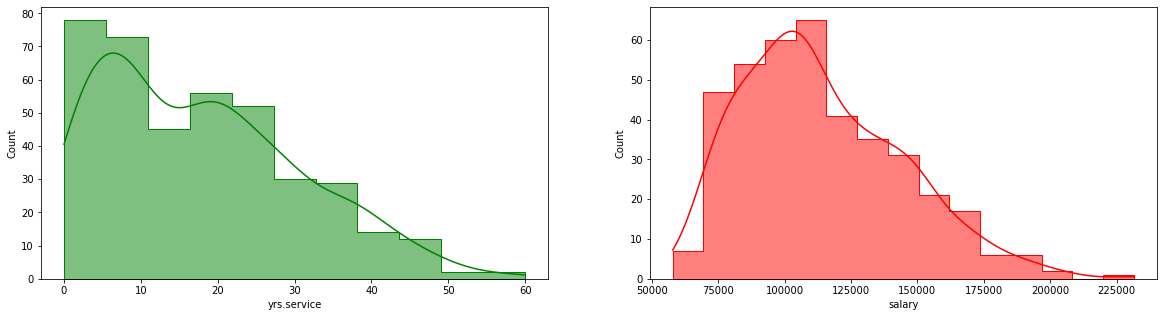

In [211]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.histplot(data = df, x='yrs.service', color='g',kde=True, element='step')

plt.subplot(1,2,2)
sns.histplot(data = df, x='salary', color='r',kde=True, element='step')

observation - data yrs.service and salary are not normalized, these are a little skewed.

# Data Cleaning

yrs.since.phd column has already been dropped because that was causing multicollinearity problem and high VIF score

# Checking for Outliers

<AxesSubplot:xlabel='yrs.service'>

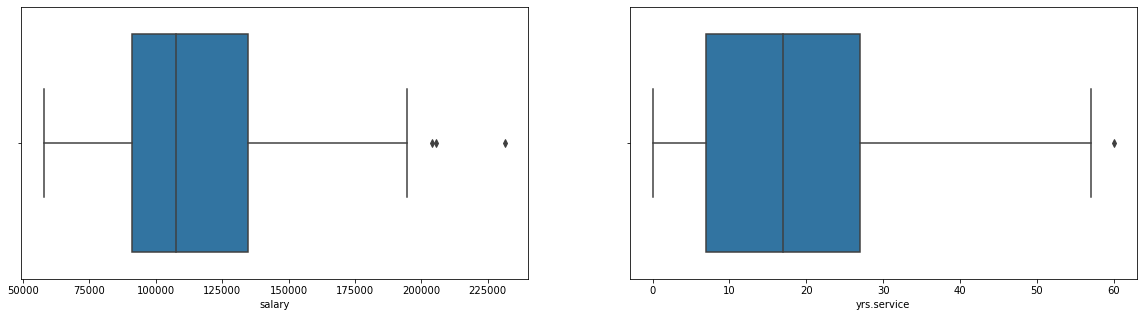

In [213]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(x=df_encoded['salary'])
plt.subplot(1,2,2)
sns.boxplot(x=df_encoded['yrs.service'])

Observation -
- both yrs.service and salary has outliers, which need to be removed

# Removing Outliers

In [224]:
#using z-score method
from scipy.stats import zscore #import zscore from spipy library

#lets create a new data_set for calculating zscore
df_zs = df_encoded.copy(deep=True)

#drop categorical data from df_zs
#drop rank, discipline and sex from df_zs
df_zs.drop(['rank'],axis=1, inplace=True)
df_zs.drop(['discipline'],axis=1, inplace=True)
df_zs.drop(['sex'],axis=1, inplace=True)

zscore(df_zs)


,yrs.service,salary
0,0.018820,0.851500
1,-0.135268,1.954661
2,-1.136841,-1.127264
3,1.636745,0.035260
4,1.790834,0.909214
...,...,...
392,0.943349,-0.356997
393,0.095864,1.208140
394,0.558128,-0.402113
395,-0.212312,-0.613478


In [225]:
z = np.abs(zscore(df_zs))
z.shape

(393, 2)

In [226]:
np.where(z>3) #detecting outliers where z>3

(array([ 43, 131, 326, 360], dtype=int64), array([1, 0, 0, 1], dtype=int64))

In [227]:
z.iloc[43] #checking one of the detected outliers

yrs.service    1.559701
salary         3.878844
Name: 43, dtype: float64

In [228]:
#checking total number of rows where z>3

len(np.where(z>3)[0])

4

length is 4 that means 4 rows out of 393 need to be eliminated from dataframe to normalize it

In [229]:
#removing outliers

df_new = df_encoded[(z<3).all(axis=1)]

print("Old Data Frame:",df_encoded.shape)
print("New Data Frame:",df_new.shape)
print("Total Dropped Rows:",df_encoded.shape[0] - df_new.shape[0])

Old Data Frame: (393, 5)
New Data Frame: (389, 5)
Total Dropped Rows: 4


In [230]:
#percent loss
percent_loss = 4*100/393
print("Percent Loss: ",percent_loss)

Percent Loss:  1.0178117048346056


so hardly 1% data loss is here, which is acceptable

# Testing for Outliers again

<AxesSubplot:xlabel='yrs.service'>

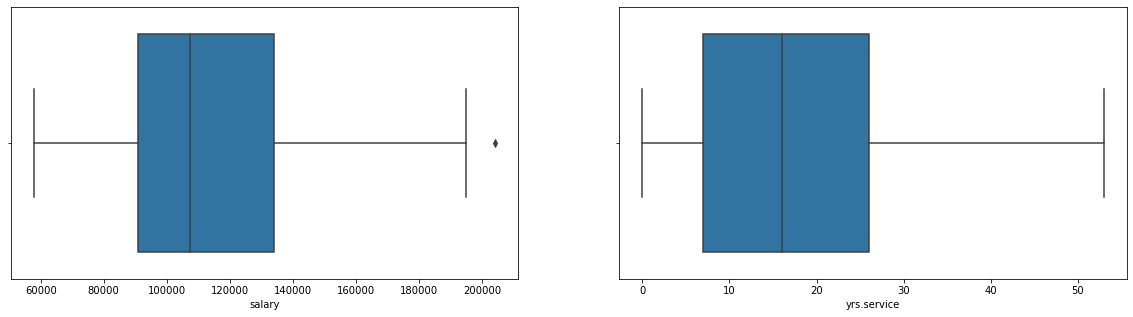

In [239]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(x=df_new['salary'])
plt.subplot(1,2,2)
sns.boxplot(x=df_new['yrs.service'])

# Data Separation

In [240]:
#independent variable
x = df_new.iloc[:,:-1]
x

#dependent variable
y = df_new.iloc[:,-1]


# Transforming data to remove skewness (Power Transform)

In [241]:
from sklearn.preprocessing import power_transform

x = power_transform(x, method='yeo-johnson')
type(x)

numpy.ndarray

In [242]:
x

array([[ 0.68488413,  0.9232448 ,  0.25279511,  0.33380918],
       [ 0.68488413,  0.9232448 ,  0.10393186,  0.33380918],
       [-1.09578732,  0.9232448 , -1.29687045,  0.33380918],
       ...,
       [ 0.68488413, -1.08313635,  0.71373257,  0.33380918],
       [ 0.68488413, -1.08313635,  0.02578726,  0.33380918],
       [-1.09578732, -1.08313635, -1.13417006,  0.33380918]])

In [243]:
x.ndim

2

In [244]:
x.mean()

-9.132940048330336e-18

So now mean is almost 0

In [245]:
x.std()

1.0

and Standard deviation is 1 so data is normalized now

# Feature Scaling using Standard Scaler

In [246]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(x)
x

array([[ 0.68488413,  0.9232448 ,  0.25279511,  0.33380918],
       [ 0.68488413,  0.9232448 ,  0.10393186,  0.33380918],
       [-1.09578732,  0.9232448 , -1.29687045,  0.33380918],
       ...,
       [ 0.68488413, -1.08313635,  0.71373257,  0.33380918],
       [ 0.68488413, -1.08313635,  0.02578726,  0.33380918],
       [-1.09578732, -1.08313635, -1.13417006,  0.33380918]])

# Training Model using Linear Regression

In [248]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

lr = LinearRegression()

In [249]:
for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = i)
    lr.fit(x_train, y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    
    print(f"At random state {i}, the training accuracy is {r2_score(y_train, pred_train)}")
    print(f"At random state {i}, the testing accuracy is {r2_score(y_test, pred_test)}")
    print("\n")

At random state 0, the training accuracy is 0.40388752263824634
At random state 0, the testing accuracy is 0.4070003762421768


At random state 1, the training accuracy is 0.40021106909266624
At random state 1, the testing accuracy is 0.4202229328438879


At random state 2, the training accuracy is 0.39552637295323667
At random state 2, the testing accuracy is 0.44717161124908067


At random state 3, the training accuracy is 0.4043455301381521
At random state 3, the testing accuracy is 0.3993906456258063


At random state 4, the training accuracy is 0.4250692544035304
At random state 4, the testing accuracy is 0.32316742221315


At random state 5, the training accuracy is 0.41373644164136236
At random state 5, the testing accuracy is 0.34647928009894646


At random state 6, the training accuracy is 0.46006570397515145
At random state 6, the testing accuracy is 0.1963435993558632


At random state 7, the training accuracy is 0.38095306479821067
At random state 7, the testing accuracy is

At random state = 94 training and testing accuracy is 40% approx, so train the model with random state = 94

In [252]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 94)
lr.fit(x_train,y_train)
pred_train = lr.predict(x_train)
pred_test  = lr.predict(x_test)
print(r2_score(y_train, pred_train))
print(r2_score(y_test, pred_test))

0.40050559668247177
0.4024799799681671


# Cross-validation of model

In [253]:
train_accuracy = r2_score(y_train, pred_train)
test_accuracy = r2_score(y_test, pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score = cross_val_score(lr,x,y,cv=j)
    cv_mean = cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and accuracy for testing is {test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.36827499310803424 and accuracy score for training is 0.40050559668247177 and accuracy for testing is 0.4024799799681671


At cross fold 3 the cv score is 0.3502248039380218 and accuracy score for training is 0.40050559668247177 and accuracy for testing is 0.4024799799681671


At cross fold 4 the cv score is 0.3739452721956479 and accuracy score for training is 0.40050559668247177 and accuracy for testing is 0.4024799799681671


At cross fold 5 the cv score is 0.350758896907654 and accuracy score for training is 0.40050559668247177 and accuracy for testing is 0.4024799799681671


At cross fold 6 the cv score is 0.37025438426628127 and accuracy score for training is 0.40050559668247177 and accuracy for testing is 0.4024799799681671


At cross fold 7 the cv score is 0.3656090666237789 and accuracy score for training is 0.40050559668247177 and accuracy for testing is 0.4024799799681671


At cross fold 8 the cv score is 0.37984827002232957 and accuracy scor

the best CV score is 37.98% at cross fold 8

Observation - CV Score - 37.98% and R2 Score = 40%

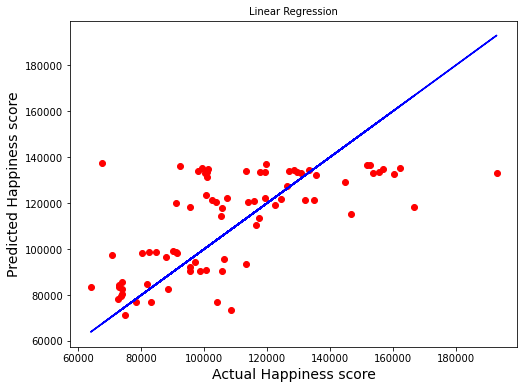

In [266]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Happiness score', fontsize = 14)
plt.ylabel('Predicted Happiness score', fontsize = 14)
plt.title('Linear Regression',fontsize=10)
plt.show()

# Regularization using Lasso

In [257]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters = {'alpha' :[.0001, .001, .01, .1, 1, 10], 'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [258]:
ls = Lasso(alpha=10,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

lss = r2_score(y_test,pred_ls)
lss

0.40267230737644755

# Cross Validation of the model

In [260]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.3507718660797007

Observation -
CV Score - 35%, r2_score = 40.26% for lasso

# Ensemble Technique using Random Forest Regressor

In [262]:
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse', 'mae'],'max_features':["auto", "sqrt", "log2"]}
rf =RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'sqrt'}


In [263]:
rf= RandomForestRegressor(criterion="mae",max_features="log2")
rf.fit(x_train, y_train)
rf.score(x_train, y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)

R2 Score: 34.91989108999398


# Cross Validation of the model

In [264]:
rfscore = cross_val_score(rf,x,y,cv=5)
rfc = rfscore.mean()
print('Cross Val Score:',rfc*100)

Cross Val Score: 25.986156486088024


Observation -
CV Score - 25.98% and R2 Score - 34.91%

AS linear Regression has higher R2 Score and CV Score, saving that as a final model

# Saving the final Model

In [272]:
import pickle
filename = 'salary_project.pkl'
pickle.dump(lr,open(filename,'wb'))

# Conclusion

In [273]:
loaded_model = pickle.load(open('salary_project.pkl','rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

40.24799799681671


In [276]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])

In [277]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
Predicted,136466.473556,133594.352591,92049.928219,133380.096657,90793.932251,120552.666364,80610.907763,133594.352591,133160.014715,90432.463076,...,120739.185838,83561.342793,83561.342793,133380.096657,133160.014715,134777.629501,117915.083154,134006.977282,98921.032936,135488.461415
Original,152708.000000,155750.000000,95611.000000,129600.000000,100522.000000,103649.000000,74000.000000,117704.000000,193000.000000,95436.000000,...,115800.000000,73000.000000,63900.000000,101000.000000,130664.000000,156938.000000,105668.000000,113398.000000,82379.000000,99418.000000


# OUR MODEL IS ONLY 40% ACCURATE